In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

In [2]:
# Load income dataset
income = pd.read_csv('income/income.csv')

In [3]:
income.columns

Index(['age', 'workclass', 'gender', 'income'], dtype='object')

What are the columns of this dataset?

'age', 'workclass', 'gender', 'income'

Plot a histogram of the age column. Does the histogram make sense? If not, can you find the bad data points?

_Hint: Does it make sense for the histogram to  extend past 100?_

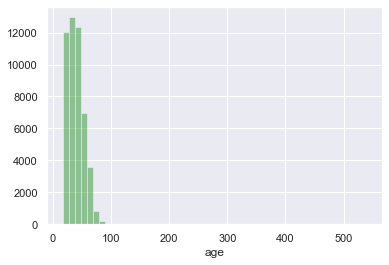

In [4]:
income_age = income['age']

sns.distplot(income_age, kde = False, label="Age", color="green");

In [5]:
# From the histogram above, we notice that there exists data points with age 100+ which don't make sense.
# You can't exactly see where the point is but since the histogram extends to 500+, you know it is around there.
income_age_bad = income[income['age'] > 100]['age']
income_age_bad

28    540
Name: age, dtype: int64

Remove any of the bad data points you found above.

In [6]:
income.drop(28,axis=0,inplace=True)
income_age_bad = income[income['age'] > 100]['age']
income_age_bad

Series([], Name: age, dtype: int64)

#### Removing Nulls

In [7]:
# Print the table
income

,age,workclass,gender,income
0,25,Private,Male,<=50K
1,38,Private,Male,<=50K
2,28,Local-gov,Male,>50K
3,44,Private,Male,>50K
4,18,?,Female,<=50K
5,34,Private,Male,<=50K
6,29,?,Male,<=50K
7,63,Self-emp-not-inc,Male,>50K
8,24,Private,Female,<=50K
9,55,Private,Male,<=50K


How are null values represented in this dataset?

Null values are represented with '?'.

Filter out all the rows that contain null values.

In [8]:
income.replace('?', np.nan, inplace=True) # Replace '?' with nan
income_dropped = income.dropna(axis=0, subset=['workclass']) # Drop all rows with nan in the workclass column
income_dropped

,age,workclass,gender,income
0,25,Private,Male,<=50K
1,38,Private,Male,<=50K
2,28,Local-gov,Male,>50K
3,44,Private,Male,>50K
5,34,Private,Male,<=50K
7,63,Self-emp-not-inc,Male,>50K
8,24,Private,Female,<=50K
9,55,Private,Male,<=50K
10,65,Private,Male,>50K
11,36,Federal-gov,Male,<=50K


Which columns need one-hot encoding?

'workclass', 'gender', 'income'

Apply one-hot encoding to those columns. Hint: use `get_dummies()`

In [9]:
income = pd.get_dummies(income_dropped, columns=['workclass', 'gender', 'income'])
income

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,gender_Female,gender_Male,income_<=50K,income_>50K
0,25,0,0,0,1,0,0,0,0,0,1,1,0
1,38,0,0,0,1,0,0,0,0,0,1,1,0
2,28,0,1,0,0,0,0,0,0,0,1,0,1
3,44,0,0,0,1,0,0,0,0,0,1,0,1
5,34,0,0,0,1,0,0,0,0,0,1,1,0
7,63,0,0,0,0,0,1,0,0,0,1,0,1
8,24,0,0,0,1,0,0,0,0,1,0,1,0
9,55,0,0,0,1,0,0,0,0,0,1,1,0
10,65,0,0,0,1,0,0,0,0,0,1,0,1
11,36,1,0,0,0,0,0,0,0,0,1,1,0


To put everything together, create a histogram that displays the number of people with over and under 50k income for each gender.

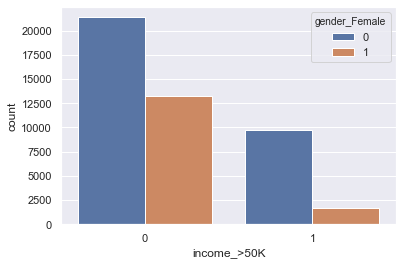

In [10]:
sns.countplot(x=income['income_>50K'], hue=income["gender_Female"]);